In [1]:
import requests
import pandas as pd
import pandas_profiling
import matplotlib

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_22438/2201697886.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
r = requests.get('https://sigongan-3f44b-default-rtdb.firebaseio.com/archive.json').json()
list = [value for key, value in r.items()]

In [3]:
df = pd.DataFrame(list)

In [4]:
df = df.drop_duplicates(subset='descTimestamp')

In [5]:
df['latency'] = df['descTimestamp'] - df['imageTimetamp']

In [6]:
def int2dt(_df):
    _df = pd.to_datetime(_df, unit='ms', utc=True)
    _df = _df.apply(lambda x: x.tz_convert(tz='Asia/Seoul'))
    return _df

for column in ['descTimestamp', 'imageTimetamp', 'timeStamp']:
    df[column] = int2dt(df[column])

df['imageTimestamp'] = df['imageTimetamp']
df = df.drop('imageTimetamp', axis = 1)

In [7]:
df['day'] = df['imageTimestamp'].dt.day
df['hour'] = df['imageTimestamp'].dt.hour
df['len'] = df['description'].apply(lambda x: len(x))

In [ ]:
pr = df.profile_report()

In [ ]:
pr.to_file('report.html')

<AxesSubplot: ylabel='Frequency'>

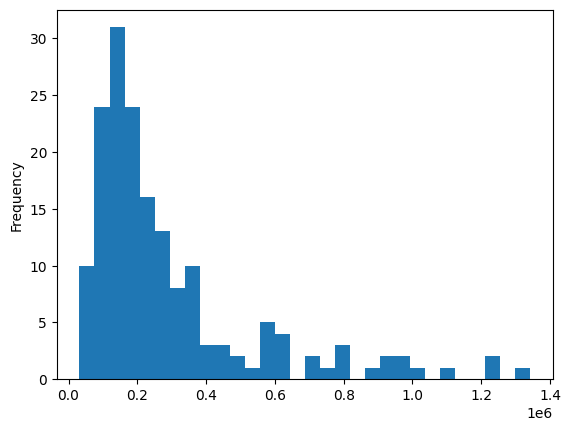

In [12]:
df.loc[df.latency < 3000000].latency.plot.hist(bins = 30)